## Classification tasks and decision boundaries

- In a classification data is group into classes/vategories.
- In classification tasks, the model finds decision boundaries seperating one class from another

### Lgistic regression

- Logistic regression is used to determine the probablity of an event.
- The weights and bias are estimated using either maximum likelihood estimator or stochastic gradient descent.
- cross-entropy term

### Logistic regression on MNIST dataset

- Use the MNIST dataset, of hand draw 10 digits, to create a simple classification example

In [6]:
## Import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

In [7]:
## Import MNIST from tensorflow
((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [8]:
## Pre-process the data, by normalizing the images
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)

test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [9]:
## Define a very simple model
model = K.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
## use SparseCategoricalCrossentropy loss with logits set to True, since the labels are integral values
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=train_data, y=train_labels, 
                    epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


2024-07-01 03:00:36.797864: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.
/usr/local/lib/python3.11/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.5112 - accuracy: 0.8690 - val_loss: 0.3176 - val_accuracy: 0.9139
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3178 - accuracy: 0.9113 - val_loss: 0.2915 - val_accuracy: 0.9190
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2940 - accuracy: 0.9176 - val_loss: 0.2765 - val_accuracy: 0.9226
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2818 - accuracy: 0.9210 - val_loss: 0.2699 - val_accuracy: 0.9266
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2739 - accuracy: 0.9229 - val_loss: 0.2694 - val_accuracy: 0.9270
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9252 - val_loss: 0.2666 - val_accuracy: 0.9277
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2639 - accuracy: 0.9259 - val_loss: 0.2623 - val_accuracy: 0.9290
Epo

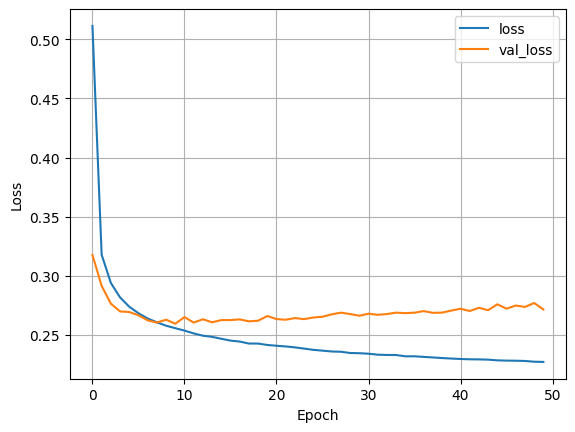

In [12]:
## Plot of loss, since validation loss and training loss diverge the training loss is decreasing.  
##     As the training loss is decreasing the validation loss increases thus the model is overfitting.

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
## Build two utilit functions to help visualize the hadwritten digits and the probability of 
##     the 10 units in the output:

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                                         100*np.max(predictions_array),
                                                         true_label),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array,
                       color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

313/313 [==============================] - 0s 650us/step


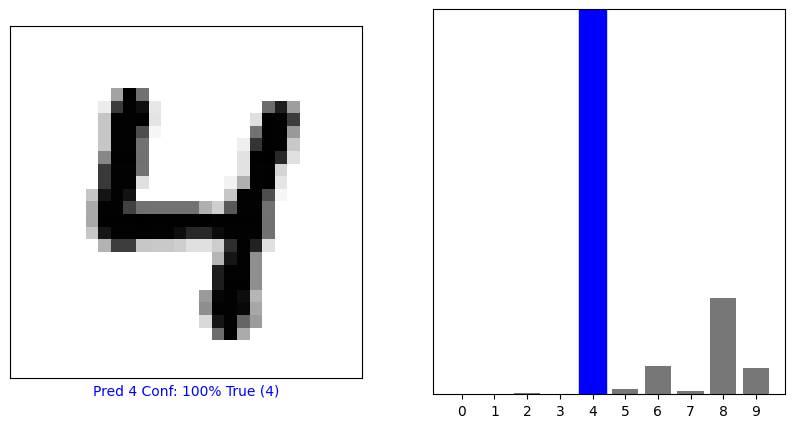

In [25]:
## Use these functions to plot our predictions

predictions = model.predict(test_data)
i = 56
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_data)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [27]:
## To stay true to logistic regression we used a sigmoid activation function and one Dense Layer. 
##    for better performance add dense layers and use softwax

better_model = K.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(better_model.summary())


## Rerun our new model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=train_data, y=train_labels, 
                    epochs=50, verbose=1, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50


2024-07-01 03:18:47.945418: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 2s 1ms/step - loss: 0.2268 - accuracy: 0.9371 - val_loss: 0.2747 - val_accuracy: 0.9276
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2268 - accuracy: 0.9373 - val_loss: 0.2757 - val_accuracy: 0.9293
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2265 - accuracy: 0.9368 - val_loss: 0.2725 - val_accuracy: 0.9296
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2266 - accuracy: 0.9364 - val_loss: 0.2757 - val_accuracy: 0.9280
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2260 - accuracy: 0.9366 - val_loss: 0.2750 - val_accuracy: 0.9290
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2258 - accuracy: 0.9370 - val_loss: 0.2750 - val_accuracy: 0.9293
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2255 - accuracy: 0.9369 - val_loss: 0.2750 - val_accuracy: 0.9290
Epo

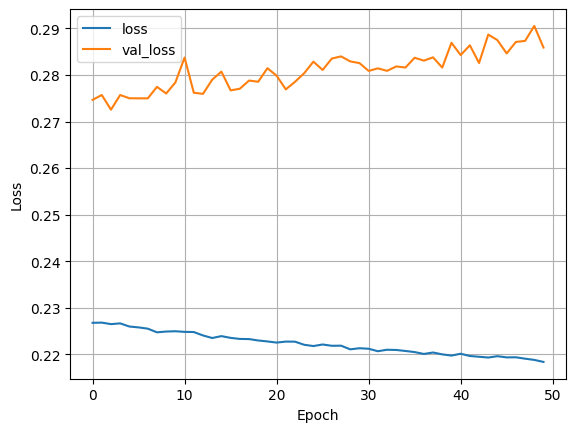

313/313 [==============================] - 0s 683us/step


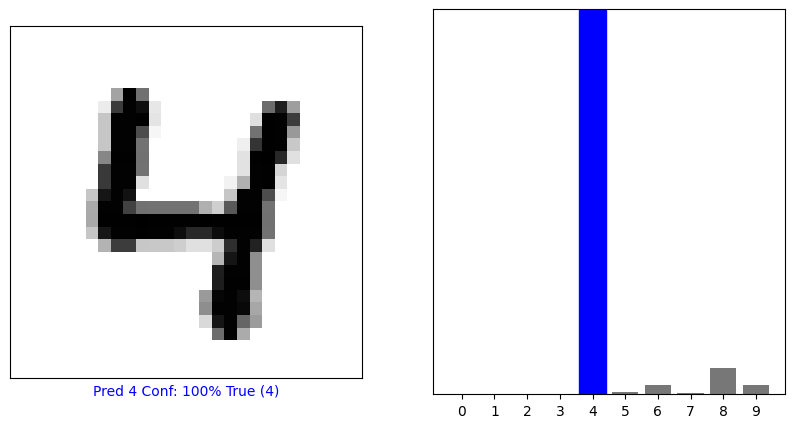

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

predictions = model.predict(test_data)
i = 56
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_data)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()